In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os

## Self Play Plot

In [10]:
def plot(x, y, fig, style = '-', legend = None, title = "performance", y_label = "total rewards"):
    
    plt.plot(x, y, style)
    plt.title(title)
    if legend is not None:
        plt.legend(legend)
    plt.xlabel("episodes")
    plt.ylabel(y_label)
    return plt
#     plt.show()
    
def readResult(filename, train_episode = 40):
    x_reward = []
    y_reward = []
    x_update = []
    y_update = []
    x_seperate = []
    y_seperate = []
    seperate_i = 0
    seperate_j = 0
    
    x_seperate.append([])
    y_seperate.append([])
    f = open(filename, 'r')
    lines = f.readlines()
    for i,l in enumerate(lines):
        if l == "Update agent\n":
            seperate_i += 1
            seperate_j += 1
            x_seperate.append([])
            y_seperate.append([])
            y_update.append(y_reward[-1])
            x_update.append(x_reward[-1])
        else:
            y_reward.append(float(l[0:-1]))
            x_reward.append((i + 1) * train_episode)
            
            y_seperate[seperate_j].append(float(l[0:-1]))
            x_seperate[seperate_i].append(((i + 1) * train_episode))
    return x_reward, y_reward,x_update, y_update, x_seperate, y_seperate

def mean(y):
    meany = []
    sum = 0
    for i, v in enumerate(y):
        sum += v
        meany.append(sum / (i + 1))
    return meany

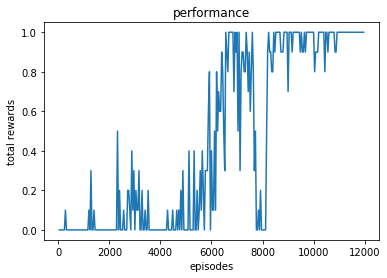

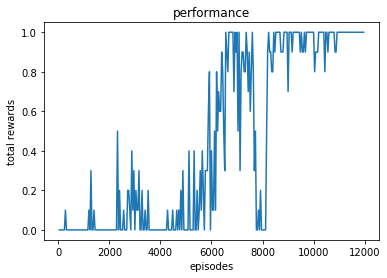

In [37]:
fig_num = 1
fig = plt.figure(num = fig_num)
x_reward, y_reward,x_update, y_update, x_seperate, y_seperate = readResult("../../result_gqf_v10_sepcific_2.txt")
# my = mean(y)
for i in range(len(x_seperate)):
    plot(x_seperate[i], y_seperate[i], fig)
plot(x_update, y_update, fig, style = 'ro')

# x_reward, y_reward,x_update, y_update, x_seperate, y_seperate = readResult("result_gqf_v6.txt")
# # my = mean(y)
# for i in range(len(x_seperate)):
#     plot(x_seperate[i], y_seperate[i], fig)

# x_reward, y_reward,x_update, y_update, x_seperate, y_seperate = readResult("result_gqf_v6(non-norm).txt")
# # my = mean(y)
# for i in range(len(x_seperate)):
#     plot(x_seperate[i], y_seperate[i], fig,legend = ["8f+damageToNexus(norm)", "8f+damageToNexus"])
# fig.show()
# plot(x,my, ["withOnehotAndNormalize","mean"], fig = 3)
for i in range(len(x_seperate)):
    fig_num += 1
    fig = plt.figure(num = fig_num)
    plot(x_seperate[i], y_seperate[i], fig)

## Model based vs model-free

self_model_free

TugOfWar_eval.pupdate_121

TugOfWar_eval-Copy1.p

TugOfWar_eval.p

TugOfWar_eval.pupdate_300

self_model_free

TugOfWar_eval.pupdate_121

TugOfWar_eval-Copy1.p

TugOfWar_eval.p

TugOfWar_eval.pupdate_300

self_model_free

TugOfWar_eval.pupdate_121

TugOfWar_eval-Copy1.p

TugOfWar_eval.p

TugOfWar_eval.pupdate_300



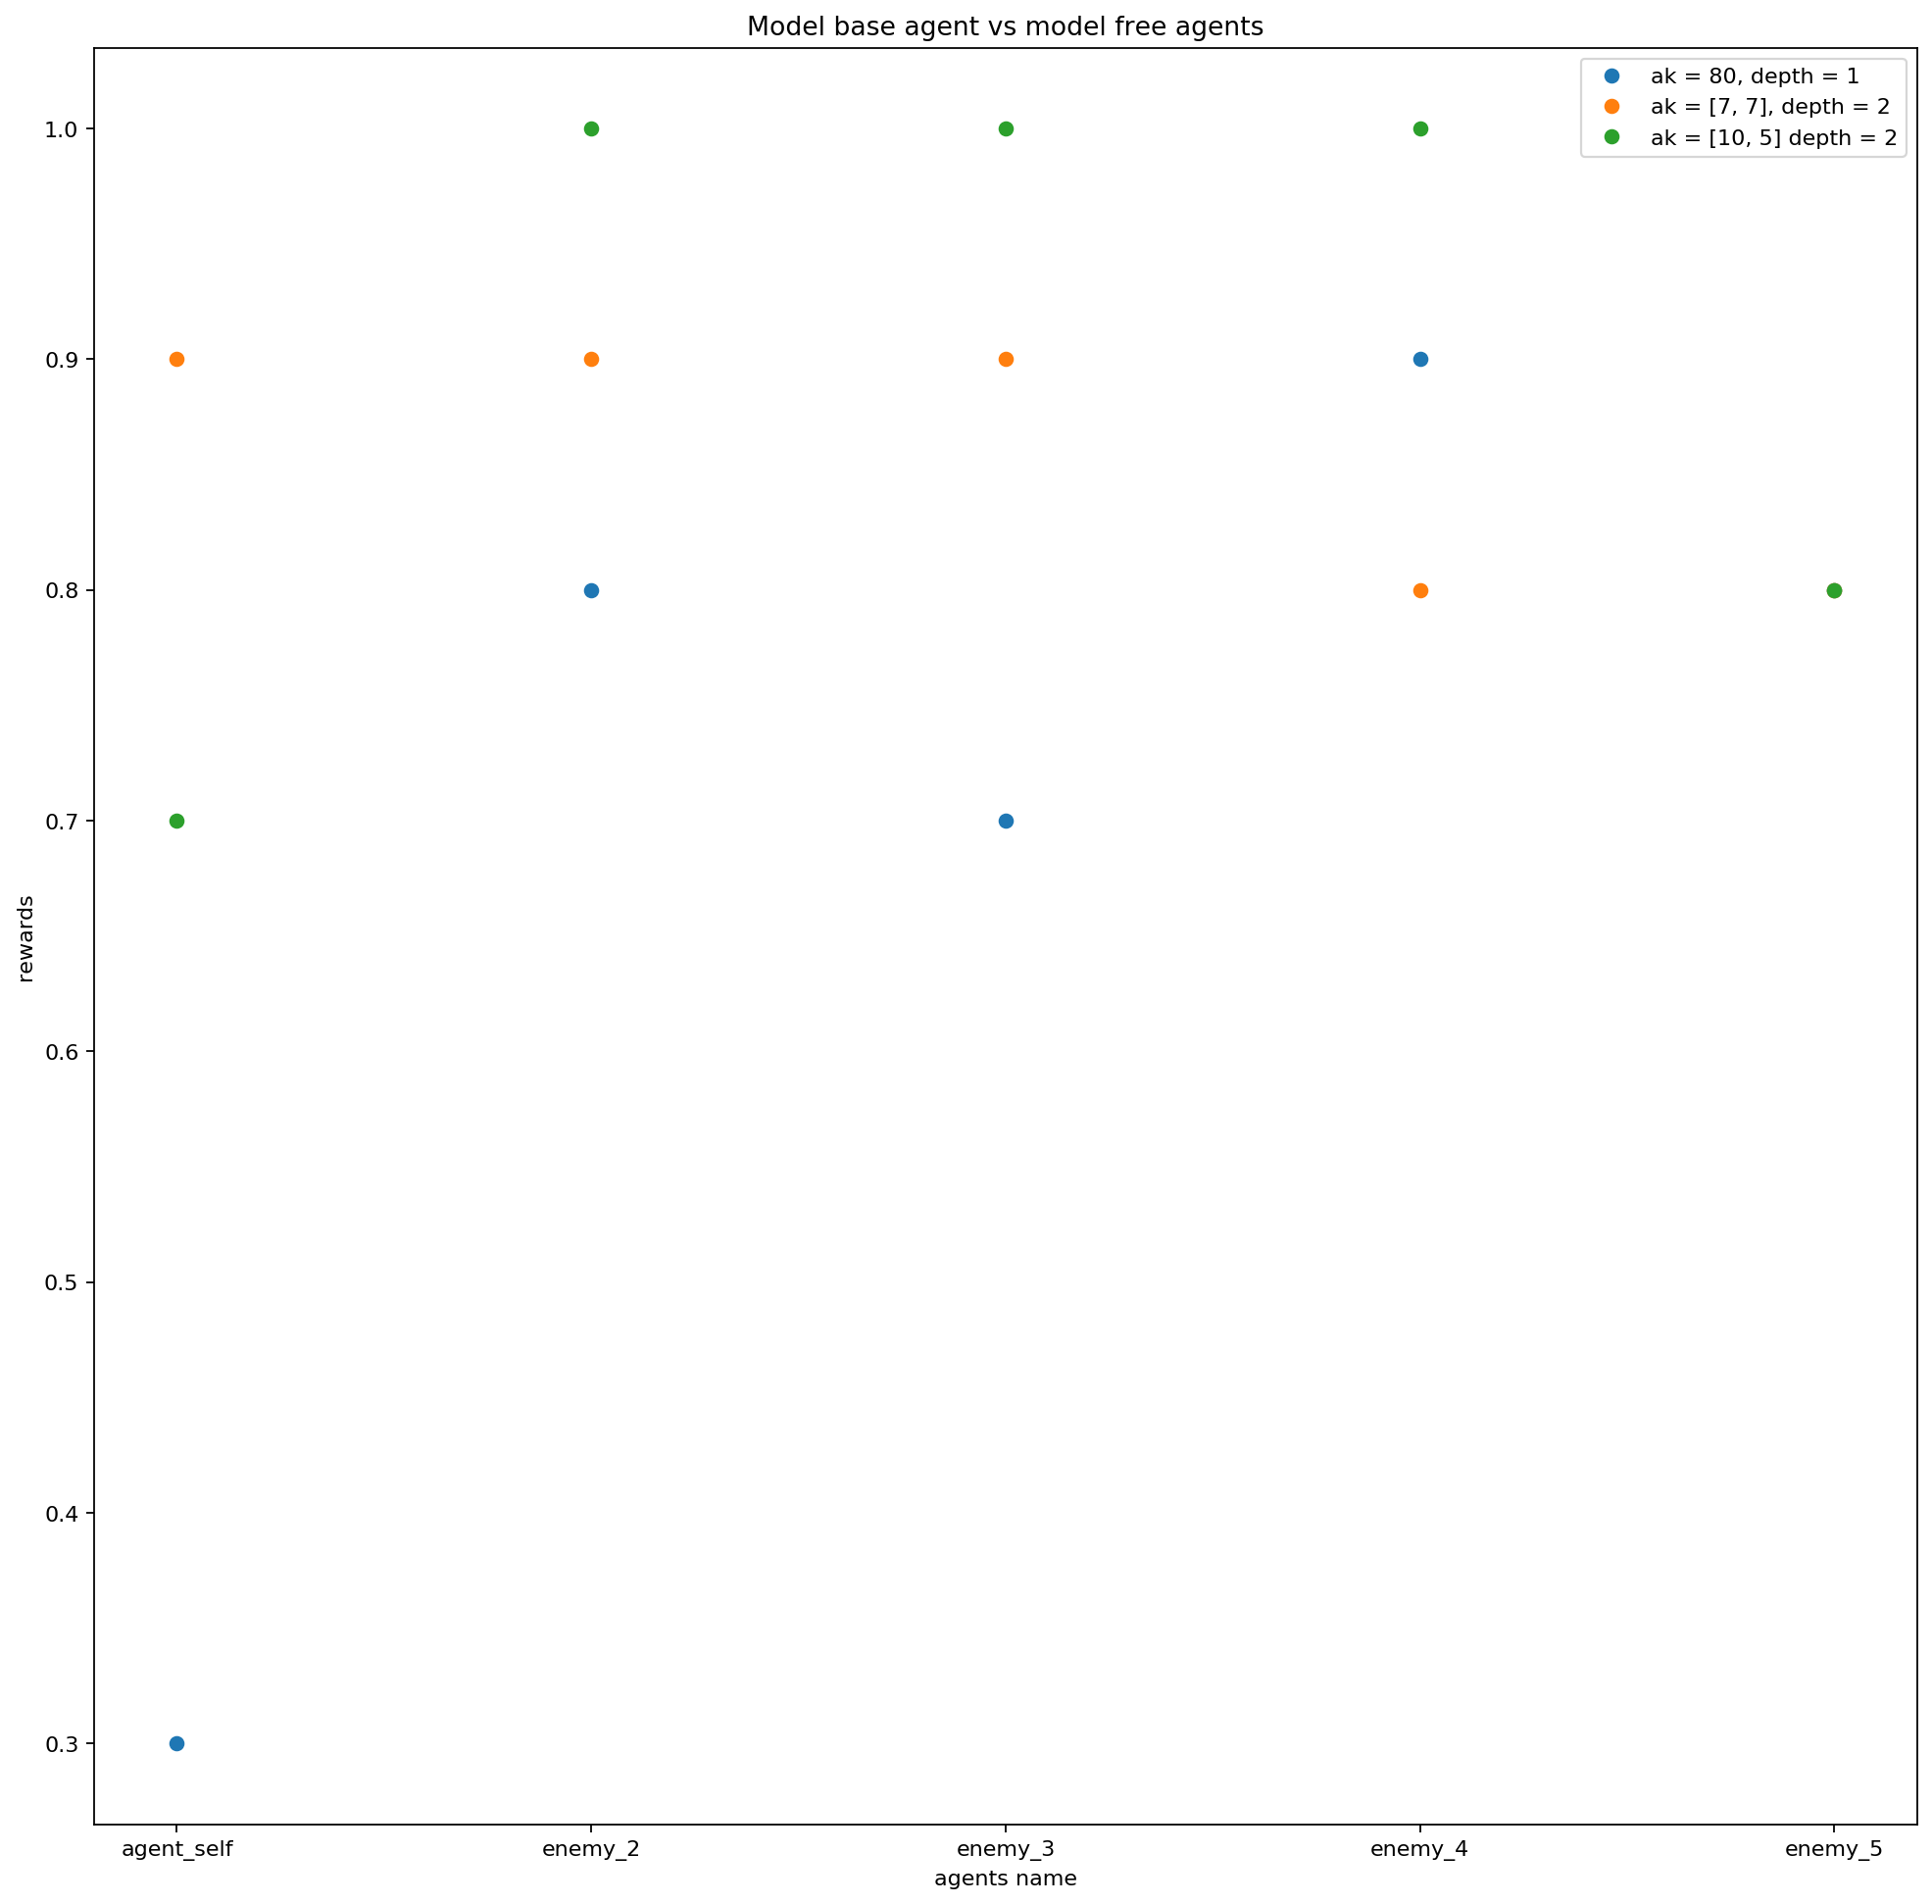

In [9]:
def read_data(filename, agent_self):
    f = open(filename, 'r')
    lines = f.readlines()
    names = []
    values = []
    for i, l in enumerate(lines):
        if i % 3 == 0:
            print(l)
            if l == agent_self:
                names.append("agent_self")
            else:
                names.append("enemy_" + str(int(i / 3 + 1)))
        elif i % 3 == 1:
            values.append(float(l))
#     print(names)
#     print(values)
    return names, values
def plot(all_value, all_names, legends):
    fig=plt.figure(figsize=(15, 15), dpi= 160, facecolor='w', edgecolor='k')
    for i in range(len(legends)):
        plt.plot(all_value[i], all_names[i], 'o')
        
    plt.title('Model base agent vs model free agents')
    plt.legend(legends)
    plt.xlabel("agents name")
    plt.ylabel("rewards")

    return plt
    
data_file = ["../../result_model_based_grid_v10.txt", "../../result_model_based_grid_v6.txt", "../../result_model_based_grid_v11.txt"]
legends = ["ak = 80, depth = 1", "ak = [7, 7], depth = 2", "ak = [10, 5] depth = 2"]#, "model free agent"]
all_values = []
all_names = []
# skips = [1, 2]
for i, df in enumerate(data_file):
#     if i in skips:
#         continue
    values, names = read_data(df, "self_model_free\n")
    all_values.append(values)
    all_names.append(names)
    
p = plot(all_values, all_names, legends)
p.show()
        

### The GVFs loss and learning curve

<module 'matplotlib.pyplot' from '/home/xian/.conda/envs/general/lib/python3.6/site-packages/matplotlib/pyplot.py'>

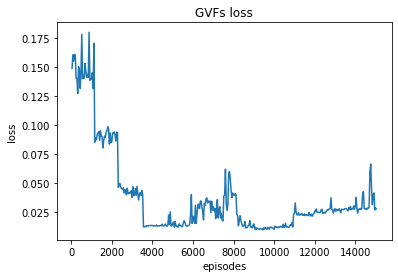

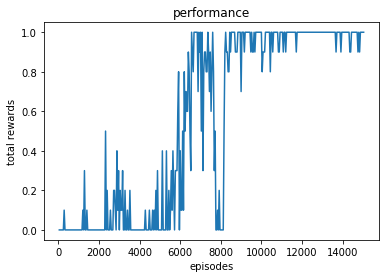

In [43]:
fig_num = 1
fig = plt.figure(num = fig_num)
x_reward, y_reward,x_update, y_update, x_seperate, y_seperate = readResult("../../result_gqf_v10_sepcific_2_GVFs_loss.txt")
# my = mean(y)
for i in range(len(x_seperate)):
    plot(x_seperate[i], y_seperate[i], fig)
plot(x_update, y_update, fig, style = 'ro', title = "GVFs loss", y_label = "loss")

fig_num = 2
fig = plt.figure(num = fig_num)
x_reward, y_reward,x_update, y_update, x_seperate, y_seperate = readResult("../../result_gqf_v10_sepcific_2.txt")
for i in range(len(x_seperate)):
    plot(x_seperate[i], y_seperate[i], fig)
plot(x_update, y_update, fig, style = 'ro')

### The GVFs loss by steps

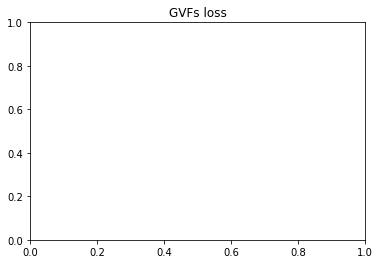

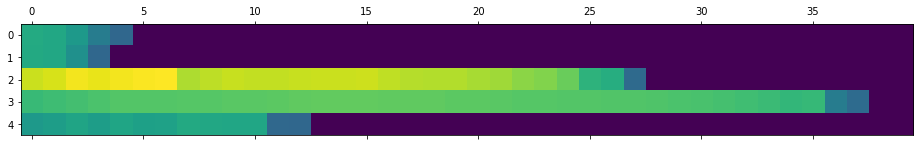

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def plot_loss_step(data, title = "GVFs loss", vmin=0, vmax=0.1):
    plt.title(title)
    plt.matshow(data, vmin=vmin, vmax=vmax)

    plt.show()
    
test_data = np.array([[0.0268, 0.0264, 0.0237, 0.0185, 0.0147, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000],
                     [0.0266, 0.0264, 0.0220, 0.0147, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000],
                     [0.0404, 0.0412, 0.0432, 0.0424, 0.0431, 0.0436, 0.0439, 0.0385, 0.0396,
        0.0402, 0.0399, 0.0399, 0.0402, 0.0404, 0.0403, 0.0405, 0.0397, 0.0390,
        0.0389, 0.0388, 0.0381, 0.0377, 0.0363, 0.0356, 0.0339, 0.0283, 0.0274,
        0.0152, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000],
                     [0.0296, 0.0303, 0.0308, 0.0314, 0.0321, 0.0322, 0.0321, 0.0323, 0.0324,
        0.0326, 0.0327, 0.0329, 0.0332, 0.0334, 0.0334, 0.0334, 0.0331, 0.0332,
        0.0331, 0.0328, 0.0329, 0.0327, 0.0324, 0.0323, 0.0322, 0.0321, 0.0320,
        0.0319, 0.0318, 0.0315, 0.0313, 0.0310, 0.0305, 0.0299, 0.0291, 0.0294,
        0.0185, 0.0153, 0.0000, 0.0000],
#                      [0.1578, 0.1597, 0.1616, 0.1633, 0.1625, 0.1578, 0.1590, 0.1606, 0.1625,
#         0.1630, 0.1627, 0.1620, 0.1629, 0.1634, 0.1612, 0.1613, 0.1605, 0.1615,
#         0.1629, 0.1634, 0.1629, 0.1635, 0.1624, 0.1640, 0.1608, 0.1639, 0.1566,
#         0.1539, 0.1451, 0.1427, 0.1262, 0.0982, 0.0939, 0.0723, 0.0929, 0.0751,
#         0.0867, 0.0934, 0.1038, 0.1036],
                     [0.0236, 0.0245, 0.0257, 0.0244, 0.0258, 0.0249, 0.0252, 0.0266, 0.0264,
        0.0259, 0.0259, 0.0149, 0.0147, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000],])
plot_loss_step(test_data, vmin=test_data.min(), vmax=test_data.max())
# for td in test_data:
#     print()
#     plot_loss_step([td], vmin=td.min(), vmax=td.max())